## 梯度下降法

根据上一节得到的参数 w 和 b 的更新公式，和线性回归一样，为了保证求值稳定，我们在求和的基础上乘以 $\frac{1}{n}$：

$$
w := w - \eta \frac{\partial loss}{\partial w} = w + \eta \frac{1}{n} \sum_{i=1}^n (y_i - \pi(x_i))x_i
$$

$$
b := b - \eta \frac{\partial loss}{\partial b} = b + \eta \frac{1}{n} \sum_{i=1}^n (y_i - \pi(x_i))
$$

我们就可以用代码实践一把了。首先把最开始的例子散点图画出来：

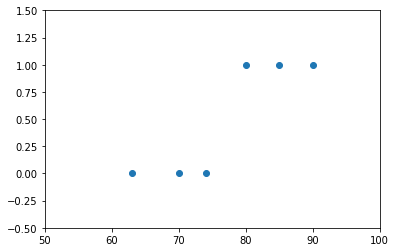

In [5]:
import numpy as np
import matplotlib.pyplot as plt

plt.xlim(50, 100)
plt.ylim(-0.5, 1.5)

X = np.array([80, 85, 74, 63, 90, 70])
Y = np.array([1, 1, 0, 0, 1, 0])
plt.scatter(X, Y)

plt.show()

In [6]:
def pi(x, w, b):
    return np.exp(w*x+b) / (1 + np.exp(w*x+b))

# 参数 w 的更新公式
def update_w(X, Y, w, b, eta):
    s = 0
    for i in range(X.size):
        s += (Y[i] - pi(X[i], w, b))*X[i]
    return w + eta * s * (1./Y.size)

# 参数 b 的更新公式
def update_b(X, Y, w, b, eta):
    s = 0
    for i in range(X.size):
        s += (Y[i] - pi(X[i], w, b))
    return b - eta * s * (1./Y.size)

我们选取参数的初始值 $(w, b) = (0, 0)$，并令学习率 $\eta = 0.01$，然后进行第一次迭代：

w = -1.9200246451631382, b = 153.99999999880168


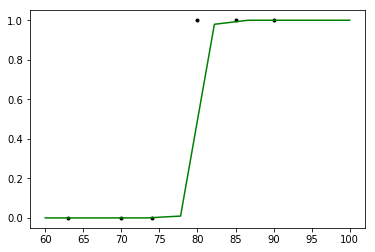

In [26]:
w = -2
b = 154
eta = 0.01

w_new = update_w(X, Y, w, b, eta)
b_new = update_b(X, Y, w, b, eta)
print("w = {0}, b = {1}".format(w_new, b_new))

x = np.linspace(60, 100, 10)
y = 1.0 / (1 + np.exp(w_new*x+b_new))
plt.plot(X, Y, 'k.')
plt.plot(x, y, 'g-')
plt.show()

w = -2.0188563668160375, b = 163.99985433358327


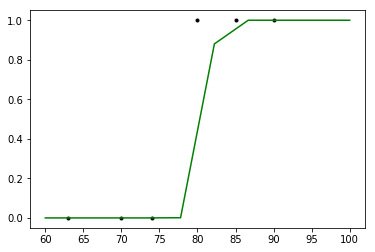

In [25]:
for i in range(10000):
    w_new = update_w(X, Y, w, b, eta)
    b_new = update_b(X, Y, w, b, eta)
    w = w_new
    b = b_new
    
print("w = {0}, b = {1}".format(w_new, b_new))

x = np.linspace(60, 100, 10)
y = 1.0 / (1 + np.exp(w_new*x+b_new))
plt.plot(X, Y, 'k.')
plt.plot(x, y, 'g-')
plt.show()

* TODO: 为啥不能收敛？

## 牛顿法